# Facebook Project

### importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [38]:
pip install streamlit


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 4.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/8.7 MB 3.7 MB/s eta 0:00:02
   --------- ------------------------------ 2.1/8.7 MB 3.4 MB/s eta 0:00:02
   ----------- ---------------------------- 2.6/8.7 MB 3.5 MB/s eta 0:00:02
   --------------- ------------------------ 3.4/8.7 MB 3.5 MB/s eta 0:00:02
   ----------------- ---------------------- 3.9/8.7 MB 3.4 MB/s eta 0:00:02
   --------------------- ------------------ 4.7/8.7 MB 3.3 MB/s eta 0:00:02
   ----------------------- ---------------- 5.2/8.7 MB 3.3 MB/s eta 0:00:02
   --------------------------- ------------ 6.0/8.7 MB 3.4 MB/s eta 0:00:01
   ----------------------------- ---------- 6.6/8.7 MB 3.3 MB/s eta 0:00:01
   -------------------------------- ------- 7.1/8.7 MB 3.3 MB/s eta 0:00:01
   ---------------------------------- ----- 7.6/8.7 MB 3.2 MB/s eta 0:00:01
   ---------------

### loading & inspecting data 

In [2]:
df = pd.read_csv('facebook_ads.csv', encoding="ISO-8859-1")
df.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               499 non-null    object 
 1   emails              499 non-null    object 
 2   Country             499 non-null    object 
 3   Time Spent on Site  499 non-null    float64
 4   Salary              499 non-null    float64
 5   Clicked             499 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


In [4]:
df.describe().round(2)

,Time Spent on Site,Salary,Clicked
count,499.00,499.00,499.0
mean,32.92,52896.99,0.5
std,9.10,18989.18,0.5
min,5.00,20.00,0.0
25%,26.43,38888.12,0.0
50%,33.20,52840.91,1.0
75%,39.11,65837.29,1.0
max,60.00,100000.00,1.0


## exploratory data analysis (eda)

<Axes: xlabel='Time Spent on Site'>

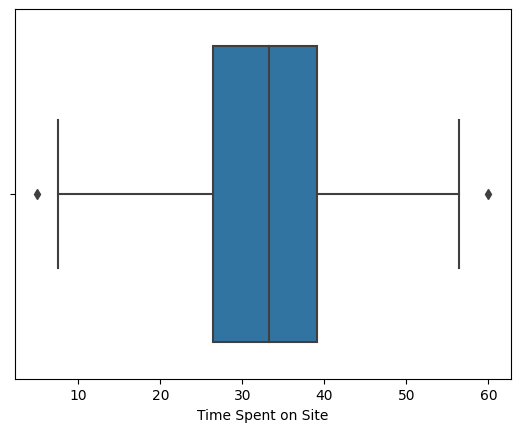

In [5]:
sns.boxplot(data=df, x='Time Spent on Site')

<Axes: xlabel='Salary'>

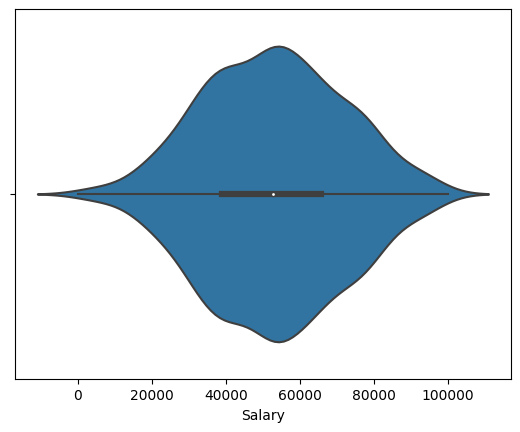

In [6]:
sns.violinplot(data=df, x='Salary')

<Axes: xlabel='Clicked'>

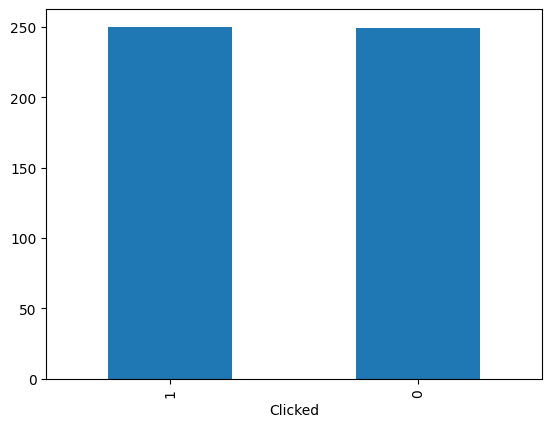

In [7]:
df['Clicked'].value_counts().plot(kind='bar')

In [8]:
px.scatter(data_frame=df, x='Time Spent on Site', y='Salary', color='Clicked')

In [9]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Display the correlation matrix with annotations
px.imshow(corr_matrix, text_auto=True)


### data preprocessing

In [10]:
df.sample(2)

,Names,emails,Country,Time Spent on Site,Salary,Clicked
457,Veda,et.euismod@Duis.co.uk,Luxembourg,25.366808,37192.01715,0
216,Quinlan S. Cantu,pede.Praesent.eu@Aliquam.net,French Polynesia,42.153653,48446.82703,1


In [11]:
df.drop(columns=['Names','emails'], inplace=True)

In [12]:
df['Country'].nunique()

210

In [13]:
df['Country'].value_counts()

Country
Israel                 6
Mauritania             6
Bolivia                6
Greenland              5
Saint Barthélemy       5
                      ..
El Salvador            1
Denmark                1
Oman                   1
Trinidad and Tobago    1
Malaysia               1
Name: count, Length: 210, dtype: int64

In [14]:
len(df['Country'])

499

In [15]:
df.drop('Country', axis=1, inplace=True)

In [16]:
X = df.drop("Clicked", axis=1)
X

,Time Spent on Site,Salary
0,25.649648,55330.06006
1,32.456107,79049.07674
2,20.945978,41098.60826
3,54.039325,37143.35536
4,34.249729,37355.11276
...,...,...
494,19.222746,44969.13495
495,22.665662,41686.20425
496,35.320239,23989.80864
497,26.539170,31708.57054


In [17]:
y = df['Clicked']
y

0      0
1      1
2      0
3      1
4      0
      ..
494    0
495    0
496    0
497    0
498    1
Name: Clicked, Length: 499, dtype: int64

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
ms = MinMaxScaler()

In [20]:
X = ms.fit_transform(X)
X

array([[0.37544814, 0.55321124],
       [0.49920194, 0.79044886],
       [0.28992687, 0.41086826],
       [0.89162409, 0.37130782],
       [0.53181325, 0.37342581],
       [0.85472629, 0.8063878 ],
       [0.68875217, 0.61900778],
       [0.37594399, 0.29837379],
       [0.64905877, 0.34267972],
       [0.44886112, 0.41087096],
       [0.51404676, 0.54117841],
       [0.53692542, 0.30207979],
       [0.36933991, 0.43752748],
       [0.7552856 , 0.48653225],
       [0.59484694, 0.64688915],
       [0.36466877, 0.17743483],
       [0.65629019, 0.49453272],
       [0.35930115, 0.38472118],
       [0.79763955, 0.34761396],
       [0.41516058, 0.5163482 ],
       [0.22006501, 0.61654096],
       [0.37450538, 0.53621488],
       [0.67725799, 0.3220154 ],
       [0.58428949, 0.51724002],
       [0.49896566, 0.51668033],
       [0.27157589, 0.34250639],
       [0.63310071, 0.70497413],
       [0.46779736, 0.67015676],
       [0.34624696, 0.36462002],
       [0.61920065, 0.29164194],
       [0.

In [21]:
y

0      0
1      1
2      0
3      1
4      0
      ..
494    0
495    0
496    0
497    0
498    1
Name: Clicked, Length: 499, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### model building & training

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
clf = LogisticRegression()

In [26]:
clf.fit(X_train, y_train)

LogisticRegression()

In [27]:
clf.coef_

array([[5.08289532, 5.26585383]])

In [28]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [29]:
y_test.values

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
print(accuracy_score(y_test, y_pred))

0.9272727272727272


In [32]:
print(confusion_matrix(y_test, y_pred))

[[80  7]
 [ 5 73]]


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        87
           1       0.91      0.94      0.92        78

    accuracy                           0.93       165
   macro avg       0.93      0.93      0.93       165
weighted avg       0.93      0.93      0.93       165



In [34]:
import pickle

In [35]:
pickle.dump(clf, open('my_model.pkl','wb'))

In [36]:
model = pickle.load(open('my_model.pkl','rb'))

In [37]:
model.predict(ms.transform([[25, 55000]]))

C:\Users\hmaze\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



array([0], dtype=int64)

---

# THANK YOU!